## Preparation

##### Import Functions

In [1]:
from Scripts.LoadCSV import LoadCSV as LoadCSV
from Scripts.Fuzzify import Fuzzify as Fuzzify
from Scripts.OptimizeBruteForceKFold import OptimizeBruteForceKFold as OptimizeBruteForceKFold
from Scripts.ValueTest import ValueTest as ValueTest
from Scripts.OptimizeBruteForce import OptimizeBruteForce as OptimizeBruteForce
from Class.Helper import Helper as Helper
import warnings
warnings.simplefilter("ignore")

import Settings.GeneralSettings as generalSettings

# import Settings.SettingsBreastCancerData as settings
# import Settings.SettingsBreastCancerWisconsin as settings
# import Settings.SettingsDataBanknoteAuthentication as settings
# import Settings.SettingsHaberman as settings
# import Settings.SettingsHeart as settings
# import Settings.SettingsHTRU as settings
# import Settings.SettingsImmunotherapy as settings
import Settings.SettingsIndianLiverPatient as settings
# import Settings.SettingsPimaIndians as settings

##### Load CSV File

In [2]:
if generalSettings.mode == 0:
    loadCSV = LoadCSV()
    samples_stats, train_stats, test_stats, train_samples = loadCSV.worker(settings.variables)

##### Fuzzify Data

In [3]:
if generalSettings.mode == 0:
    fuzzify = Fuzzify()
    changed_decisions, features_number_after_reduct, implicants_number, fuzzify_parameters = fuzzify.worker(settings.variables, "", -1)

In [4]:
if generalSettings.mode == 0:
    helper = Helper()

    fuzzification_data = [settings.variables["dataset_name"], settings.variables["gausses"], samples_stats, train_stats, test_stats, changed_decisions, round(changed_decisions / train_samples, 2), implicants_number, settings.variables["feature_numbers"], features_number_after_reduct]
    helper.saveFuzzificationStats(fuzzification_data)

    fuzzification_parameters_data = [settings.variables["dataset_name"], settings.variables["gausses"], settings.sigma_mean_params] + fuzzify_parameters
    helper.saveFuzzificationParameters(fuzzification_parameters_data)

## Train Set - K-Fold

##### Train Set | K-Fold - S Function Optymalization

In [3]:
if generalSettings.mode == 1:
    optimizeBruteForceKFold = OptimizeBruteForceKFold(settings.variables, settings.s_function_width)

In [6]:
if generalSettings.mode == 1:
    best_s_function_center, mean_s_function_center = optimizeBruteForceKFold.worker(settings.variables, settings.constraints, settings.s_function_width, settings.n_folds)

## Test Set | K-Fold Test

In [7]:
if generalSettings.mode == 1:
    valueTest = ValueTest(settings.variables, settings.s_function_width, False)

##### K-Fold Test Set | S Function Value

In [8]:
if generalSettings.mode == 1:
    valueTest.sOptymalizationWorker(settings.variables, best_s_function_center, "Test Value - K-Fold - Best Function Center")

In [9]:
if generalSettings.mode == 1:
    valueTest.sOptymalizationWorker(settings.variables, mean_s_function_center, "Test Value - K-Fold - Average Function Center")

## Training Set

In [10]:
if generalSettings.mode == 2 or generalSettings.mode == 4:
    valueTest = ValueTest(settings.variables, settings.s_function_width, True)

##### Training Set | No Optymalization

-----------------------------------------------------------------------------------
Accuracy: 0.9420600858369099
Precision: [0.97222222 0.87323944]
Recall: [0.94594595 0.93233083]
F-Score: [0.95890411 0.90181818]
Support: [333 133]
-----------------------------------------------------------------------------------
Center Point: 0.5
Time: 108.71050906181335
-----------------------------------------------------------------------------------


,F3,F1,F6,F0,F4,F9,F7,F2,F5,Decision,Decision Fuzzy,Predicted Value
275,0.0357143,0,0.00182964,0.255814,0.0571568,0.28,0.797101,0.0201072,0.00603015,Two,Two,0.395795
216,0.00510204,0,0.00121976,0.593023,0.0258915,0.28,0.507246,0.00670241,0.0130653,Two,Two,0.398932
42,0.158163,0,0.00752185,0.44186,0.276991,0.12,0.492754,0.0857909,0.00753769,Two,Two,0.399312
423,0.0408163,0,0.00996137,0.569767,0.0561798,0.48,0.550725,0.0160858,0.0170854,Two,Two,0.400242
41,0,0,0.0203293,0.674419,0.0473864,0.32,0.318841,0.00268097,0.0160804,Two,Two,0.403582
57,0.00510204,1,0.00894491,0.511628,0.0547142,0.24,0.405797,0.00670241,0.00703518,Two,Two,0.403624
466,0,1,0.00121976,0.27907,0.0361505,0.12,0.318841,0.00268097,0.00603015,Two,Two,0.41189
33,0.0561224,1,0.00955479,0.395349,0.169516,0.2,0.42029,0.0294906,0.0246231,Two,Two,0.413147
34,0.0561224,1,0.00955479,0.395349,0.169516,0.2,0.42029,0.0294906,0.0246231,Two,Two,0.413147
464,0.00510204,1,0.00874161,0.476744,0.0493405,0.06,0.26087,0.00402145,0.00552764,Two,Two,0.413683


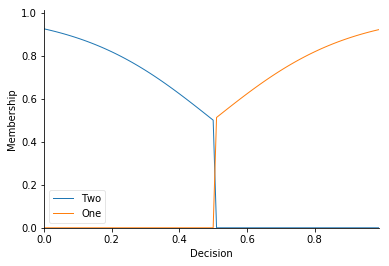

In [11]:
if generalSettings.mode == 2 or generalSettings.mode == 4:
    valueTest.noOptymalizationWorker(settings.variables)

##### Training Set | S Function Optymalization

In [4]:
if generalSettings.mode == 2 or generalSettings.mode == 4:
    optimizeBruteForce = OptimizeBruteForce(settings.variables, settings.s_function_width)

KeyboardInterrupt: 

In [ ]:
if generalSettings.mode == 2 or generalSettings.mode == 4:
    s_function_center = optimizeBruteForce.sFunctionsWorker(settings.variables, settings.constraints, settings.s_function_width)

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


##### Training Set | Threshold Optymalization

In [2]:
if generalSettings.mode == 2 or generalSettings.mode == 4:
    threshold = optimizeBruteForce.thresholdWorker(settings.variables, s_function_center, settings.s_function_width)

NameError: name 'optimizeBruteForce' is not defined

## Test Set

##### Test Set | No Optymalization 

-----------------------------------------------------------------------------------
Accuracy: 0.6495726495726496
Precision: [0.76923077 0.41025641]
Recall: [0.72289157 0.47058824]
F-Score: [0.74534161 0.43835616]
Support: [83 34]
-----------------------------------------------------------------------------------
Center Point: 0.5
Time: 30.090001344680786
-----------------------------------------------------------------------------------


,F9,F4,F5,F1,F7,F2,F6,F8,F3,F0,Decision,Decision Fuzzy,Predicted Value
364,0.28,0.0586224,0.0115578,0,0.594203,0.00536193,0.00955479,0.565217,0.00510204,0.197674,Two,Two,0.389601
466,0.12,0.0361505,0.00603015,1,0.318841,0.00268097,0.00121976,0.217391,0,0.27907,Two,Two,0.39938
148,0.544,0.0679043,0.00502513,0,0.652174,0.00670241,0.00325269,0.782609,0.00510204,0.534884,One,Two,0.399536
498,0.52,0.0429897,0.0040201,0,0.550725,0.0187668,0.00243952,0.673913,0.0204082,0.744186,One,Two,0.421878
403,0.4,0.0664387,0.00452261,0,0.521739,0.00402145,0.00243952,0.586957,0.00510204,0.709302,Two,Two,0.43098
105,0.28,0.0400586,0.0110553,0,0.347826,0.0656836,0.0166701,0.369565,0.112245,0.372093,Two,Two,0.431053
223,0.56,0.0547142,0.00502513,0,0.637681,0.00938338,0.00182964,0.782609,0.0102041,0.534884,Two,Two,0.442192
203,0.36,0.0385931,0.00854271,0,0.536232,0.0080429,0.00223623,0.565217,0.0102041,0.197674,Two,Two,0.450535
436,0.28,0.0727894,0.0155779,0,0.507246,0.0080429,0.0142305,0.478261,0.0102041,0.22093,One,Two,0.458161
389,0.28,0.0190523,0.0105528,0,0.521739,0.00268097,0.00508233,0.5,0,0.790698,One,Two,0.464853


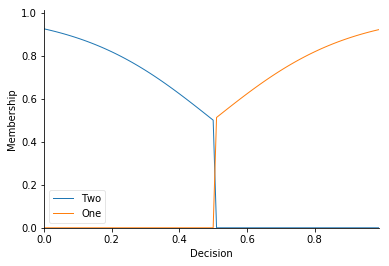

In [5]:
if generalSettings.mode == 3 or generalSettings.mode == 4:
    valueTest = ValueTest(settings.variables, settings.s_function_width, False)
    valueTest.noOptymalizationWorker(settings.variables)

##### Test Set | S Function Value

-----------------------------------------------------------------------------------
Accuracy: 0.2905982905982906
Precision: [0.         0.29059829]
Recall: [0. 1.]
F-Score: [0.         0.45033113]
Support: [83 34]
-----------------------------------------------------------------------------------
Center Point: 0.9420600858369099
Time: 33.209158182144165
-----------------------------------------------------------------------------------


,F9,F4,F5,F6,F1,F7,F2,F8,F3,F0,Decision,Decision Fuzzy,Predicted Value
466,0.12,0.0361505,0.00603015,0.00121976,1,0.318841,0.00268097,0.217391,0,0.27907,Two,Two,0.449387
116,0.12,0.765511,0.0321608,0.0282578,0,0.376812,0.00402145,0.23913,0,0.511628,One,Two,0.450751
113,0.12,0.102101,0.00703518,0.0178898,0,0.333333,0.00268097,0.23913,0,0.813953,One,Two,0.450751
461,0.484,0.120176,0.0226131,0.00264281,1,0.594203,0.00536193,0.695652,0.00510204,0.27907,One,Two,0.453747
231,0.28,0.106986,0.0376884,0.0449278,0,0.84058,0.00536193,0.73913,0,0.662791,One,Two,0.455872
364,0.28,0.0586224,0.0115578,0.00955479,0,0.594203,0.00536193,0.565217,0.00510204,0.197674,Two,Two,0.456367
545,0.24,0.0439668,0.0155779,0.00650539,1,0.26087,0.00402145,0.282609,0.00510204,0.476744,Two,Two,0.457247
148,0.544,0.0679043,0.00502513,0.00325269,0,0.652174,0.00670241,0.782609,0.00510204,0.534884,One,Two,0.459716
419,0.16,0.628725,0.0211055,0.0111811,1,0.57971,0.104558,0.434783,0.193878,0.593023,One,Two,0.461959
492,0.16,0.362482,0.061809,0.0189063,1,0.753623,0.0080429,0.521739,0.0102041,0.360465,One,Two,0.461959


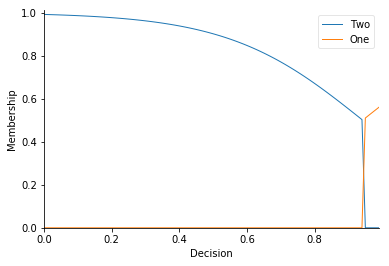

In [6]:
if generalSettings.mode == 3 or generalSettings.mode == 4:
    valueTest.sOptymalizationWorker(settings.variables, s_function_center)

##### Test Set | Threshold Value

In [ ]:
if generalSettings.mode == 3 or generalSettings.mode == 4:
    valueTest.thresholdWorker(settings.variables, s_function_center, threshold)